CPU Runtime =

T4 GPU Runtime = 3 epochs = 8hrs

A100 GPU Runtime =

In [1]:
!pip install torch torchvision torchaudio transformers scikit-learn matplotlib pandas gdown


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 100.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvj

In [2]:
import zipfile
import os
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, Dataset
from transformers import ASTFeatureExtractor, ASTForAudioClassification
from torchvision import transforms
import argparse
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import torchaudio
import pandas as pd

# train.zip path in colab
#zip_path = "/content/train.zip"

#with zipfile.ZipFile(zip_path, "r") as zip_ref:
#    zip_ref.extractall("/content/data")

!gdown --id 1Z77oaHUCYVGSSeyrq_CMXS18Huen-GSe
!gdown --id 1e_j5HlMJT0fFeSxE9qxSYqfsLu4czPSL

!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/train5499.aiff    
  inflating: train/train55.aiff      
  inflating: train/train550.aiff     
  inflating: train/train5500.aiff    
  inflating: train/train5501.aiff    
  inflating: train/train5502.aiff    
  inflating: train/train5503.aiff    
  inflating: train/train5504.aiff    
  inflating: train/train5505.aiff    
  inflating: train/train5506.aiff    
  inflating: train/train5507.aiff    
  inflating: train/train5508.aiff    
  inflating: train/train5509.aiff    
  inflating: train/train551.aiff     
  inflating: train/train5510.aiff    
  inflating: train/train5511.aiff    
  inflating: train/train5512.aiff    
  inflating: train/train5513.aiff    
  inflating: train/train5514.aiff    
  inflating: train/train5515.aiff    
  inflating: train/train5516.aiff    
  inflating: train/train5517.aiff    
  inflating: train/train5518.aiff    
  inflating: train/train5519.aiff    
  inflating: train/train552.aiff     

loaded


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

ASTMLPHead(
  (layernorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
  (dense): Linear(in_features=768, out_features=527, bias=True)
)
Epoch 1: Train Loss = 0.2251, Val Loss = 1.4812
Epoch 2: Train Loss = 0.1825, Val Loss = 1.5158
Epoch 3: Train Loss = 0.1632, Val Loss = 1.3960
Epoch 4: Train Loss = 0.1389, Val Loss = 1.4104
Epoch 5: Train Loss = 0.1149, Val Loss = 1.3367
Epoch 6: Train Loss = 0.0865, Val Loss = 1.6849
Epoch 7: Train Loss = 0.0660, Val Loss = 1.6639
Epoch 8: Train Loss = 0.0516, Val Loss = 2.1293
Epoch 9: Train Loss = 0.0393, Val Loss = 1.9922
Epoch 10: Train Loss = 0.0351, Val Loss = 2.1859
Final Evaluation:
              precision    recall  f1-score   support

           0     0.9498    0.9494    0.9496      2311
           1     0.8304    0.8316    0.8310       689

    accuracy                         0.9223      3000
   macro avg     0.8901    0.8905    0.8903      3000
weighted avg     0.9224    0.9223    0.9224      3000



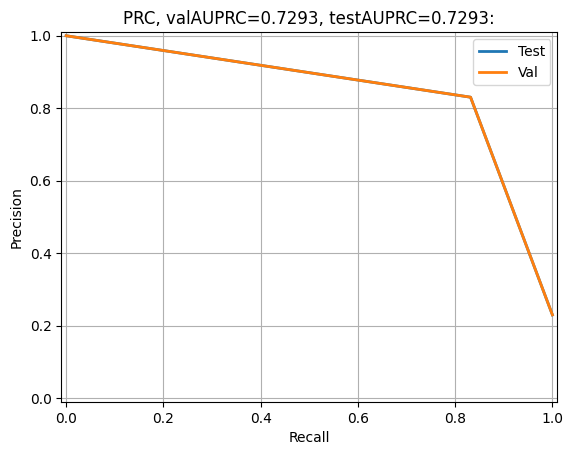

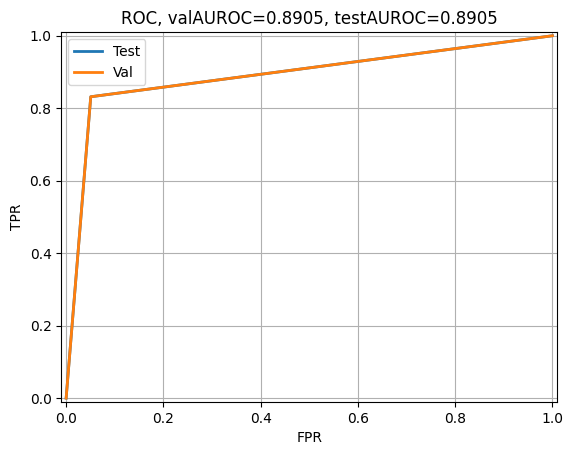

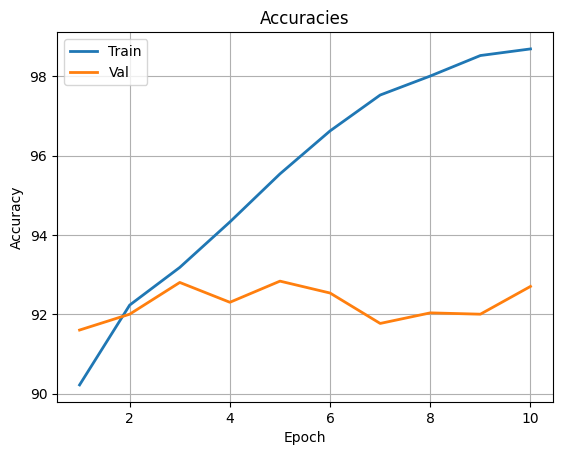

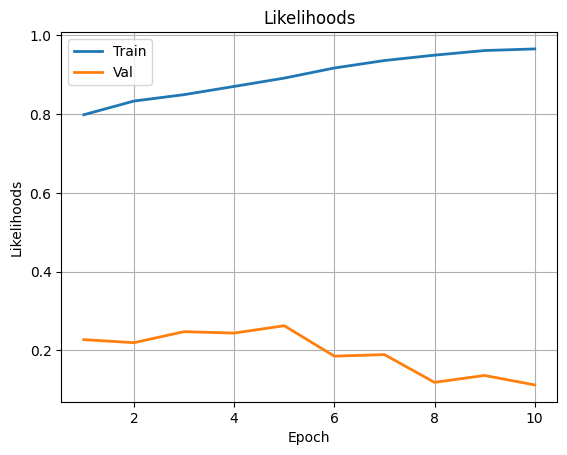

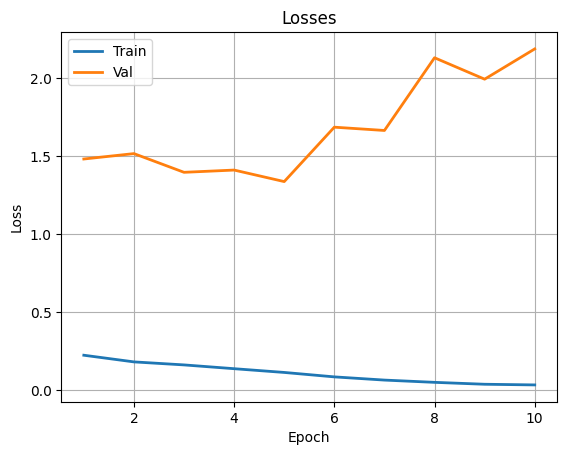


Test AUPRC: 0.73
Test AUROC: 0.89
Val  AUPRC: 0.73
Val  AUROC: 0.89

Final Train Accuracy: 98.69
Final Val Accuracy: 92.70
Final Test Accuracy: 92.23

Final Train Loss: 0.04
Final Val Loss: 2.19


In [3]:
class SpectrogramDataset(Dataset):
    def __init__(self, data_path, labels_path):

        self.df = pd.read_csv(labels_path)

        # Create data and labels
        self.data = [os.path.join(data_path, fname) for fname in self.df["clip_name"]]
        self.labels = torch.tensor(self.df["label"].values).long()

        # AST features
        self.feature_extractor = ASTFeatureExtractor()



    def __len__(self):
        return len(self.data)



    def __getitem__(self, idx):

        file_path = self.data[idx]
        waveform, sample_rate = torchaudio.load(file_path)

        # Resample to 16k
        waveform = torchaudio.functional.resample(waveform, orig_freq=sample_rate, new_freq=16000)


        # Convert to mono
        if waveform.shape[0] > 1:
            waveform = torch.mean(waveform, dim=0, keepdim=True)

        # ASTFeatureExtractor looks for shape: (time, freq)
        inputs = self.feature_extractor(waveform.squeeze(0), sampling_rate=16000, return_tensors="pt")
        x = inputs["input_values"].squeeze(0)
        y = self.labels[idx]
        return x, y



def train(model, loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    all_preds = []
    all_labels = []
    for batch in loader:
        x, y = batch
        x, y = x.to(device), y.to(device)
        outputs = model(x).logits
        loss = criterion(outputs, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * x.size(0)

        preds = torch.argmax(outputs, dim=1).detach().cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(y.detach().cpu().numpy())
    return (running_loss / len(loader.dataset)), all_labels, all_preds

def evaluate(model, loader, device):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            logits = model(x).logits
            preds = torch.argmax(logits, dim=1).cpu()
            all_preds.extend(preds.numpy())
            all_labels.extend(y.numpy())
    return classification_report(all_labels, all_preds, digits=4, zero_division=0), np.array(all_labels), np.array(all_preds)


def split_dataset(dataset, val_pct=0.1, test_pct=0.1):
    total_size = len(dataset)
    val_size = int(val_pct * total_size)
    test_size = int(test_pct * total_size)
    train_size = total_size - val_size - test_size
    return torch.utils.data.random_split(dataset, [train_size, val_size, test_size])

def plot_loss(train_losses, val_losses):
    plt.figure(figsize=(8, 4))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title("Loss Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.savefig("loss_curve.png")
    plt.show()

def plot_complete(train_losses, val_losses, train_accuracies, val_accuracies, test_labels, test_preds, val_labels, val_preds):

    # Main process taken from resultsVisualization.py and modified
    train_losses = np.array(train_losses)
    val_losses = np.array(val_losses)
    train_accuracies = np.array(train_accuracies)
    val_accuracies = np.array(val_accuracies)
    test_labels = np.array(test_labels)
    test_preds = np.array(test_preds)
    val_labels = np.array(val_labels)
    val_preds = np.array(val_preds)

    testPrecision, testRecall, testAP, testFPR, testTPR, testAUCROC = extractMetrics(test_preds, test_labels)
    valPrecision, valRecall, valAP, valFPR, valTPR, valAUCROC = extractMetrics(test_preds, test_labels)


    # PLOT AUPRC
    plt.plot(testRecall, testPrecision, linewidth=2, label="Test")
    plt.plot(valRecall, valPrecision, linewidth=2, label="Val")
    plt.ylim(-0.01, 1.01)
    plt.xlim(-0.01, 1.01)
    plt.title('PRC, valAUPRC={:.4f}, testAUPRC={:.4f}:'.format(valAP, testAP))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid()
    plt.legend(loc=0)
    plt.savefig("AUPRC_AST.png")
    plt.show()


    # PLOT AUROC
    plt.plot(testFPR, testTPR, linewidth=2, label='Test')
    plt.plot(valFPR, valTPR, linewidth=2, label='Val')
    plt.ylim(-0.01, 1.01)
    plt.xlim(-0.01, 1.01)
    plt.title('ROC, valAUROC={:.4f}, testAUROC={:.4f}'.format(valAUCROC, testAUCROC))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.grid()
    plt.legend(loc=0)
    plt.savefig("AUROC_AST.png")
    plt.show()

    # PLOT ACCURACY
    plt.plot(np.arange(1, len(train_accuracies)+1), train_accuracies, linewidth=2, label='Train')
    plt.plot(np.arange(1, len(val_accuracies)+1), val_accuracies, linewidth=2, label='Val')
    plt.title('Accuracies')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend(loc=0)
    plt.savefig("ACCURACY_AST.png")
    plt.show()

    # PLOT Norm-Likelihood
    plt.plot(np.arange(1, len(np.exp(-train_losses))+1), np.exp(-train_losses), linewidth=2, label='Train')
    plt.plot(np.arange(1, len(np.exp(-val_losses))+1), np.exp(-val_losses), linewidth=2, label='Val')
    plt.title('Likelihoods')
    plt.xlabel('Epoch')
    plt.ylabel('Likelihoods')
    plt.grid()
    plt.legend(loc=0)
    plt.savefig("Norm-Likelihood_AST.png")
    plt.show()

    # PLOT LOSS
    plt.plot(np.arange(1, len(train_losses)+1), train_losses, linewidth=2, label='Train')
    plt.plot(np.arange(1, len(val_losses)+1), val_losses, linewidth=2, label='Val')
    plt.title('Losses')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid()
    plt.legend(loc=0)
    plt.savefig("LOSS_AST.png")
    plt.show()


    print("\nTest AUPRC: {:.2f}".format(testAP))
    print("Test AUROC: {:.2f}".format(testAUCROC))

    print("Val  AUPRC: {:.2f}".format(valAP))
    print("Val  AUROC: {:.2f}".format(valAUCROC))

    #print(train_accuracies[0:10])
    print("\nFinal Train Accuracy: {:.2f}".format(train_accuracies[-1]))
    print("Final Val Accuracy: {:.2f}".format(val_accuracies[-1]))

    test_accuracies = accuracy_score(test_labels, test_preds)*100
    print("Final Test Accuracy: {:.2f}".format(test_accuracies))

    print("\nFinal Train Loss: {:.2f}".format(train_losses[-1]))
    print("Final Val Loss: {:.2f}".format(val_losses[-1]))




def extractMetrics(softPredictions, targets):
    from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, roc_auc_score
    """
    Given soft predictions and true target labels, compute evaluation metrics:
      - precision, recall: for Precision-Recall curve,
      - AP: average precision score,
      - FPR, TPR: false positive and true positive rates for ROC curve,
      - AUCROC: area under the ROC curve.

    Arguments:
      softPredictions: numpy array of soft output predictions.
      targets: numpy array of binary true labels (0 or 1).

    Returns:
      precision, recall, ap, fpr, tpr, aucroc
    """
    sp = softPredictions.ravel()
    t = targets.ravel()
    precision, recall, _ = precision_recall_curve(t, sp)
    ap = average_precision_score(t, sp)
    fpr, tpr, _ = roc_curve(t, sp)
    aucroc = roc_auc_score(t, sp)
    return precision, recall, ap, fpr, tpr, aucroc


def main(args):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    train_dataset = SpectrogramDataset(data_path=os.path.join(args.dataDir, "train"),
    labels_path=os.path.join(args.dataDir, "train.csv"))
    train_set, val_set, test_set = split_dataset(train_dataset)

    train_loader = DataLoader(train_set, batch_size=args.batch_size, shuffle=True)
    val_loader = DataLoader(val_set, batch_size=args.batch_size)
    test_loader = DataLoader(test_set, batch_size=args.batch_size)
    print("loaded")

    model = ASTForAudioClassification.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593")
    print(model.classifier)

    model.classifier = nn.Linear(model.classifier.dense.in_features, 2)  # Binary classification
    model.to(device)

    optimizer = optim.Adam(model.parameters(), lr=args.lr)
    criterion = nn.CrossEntropyLoss()

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(args.epochs):

        # Training
        model.train()
        total_train_loss = 0

        loss, train_labels, train_preds = train(model, train_loader, optimizer, criterion, device)
        train_accuracy = accuracy_score(train_labels, train_preds)
        train_accuracies.append(train_accuracy * 100)
        #print(f"Epoch {epoch+1}/{args.epochs}, Loss: {loss:.4f}")

        avg_train_loss = loss
        train_losses.append(avg_train_loss)


        # Validation
        model.eval()
        total_val_loss = 0
        with torch.no_grad():
          for batch in val_loader:
            x, y = batch
            x, y = x.to(device), y.to(device)
            outputs = model(x).logits
            loss = criterion(outputs, y)

            total_val_loss += loss.item() * x.size(0)

        _,val_labels, val_preds = evaluate(model, val_loader, device)
        val_acc = accuracy_score(val_labels, val_preds)

        avg_val_loss = total_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)
        val_accuracies.append(val_acc * 100)

        print(f"Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f}, Val Loss = {avg_val_loss:.4f}")

    #plot_loss(train_losses, val_losses)


    """
    model.eval()
    true, preds = [], []
    with torch.no_grad():
        for batch in test_loader:
            x, y = batch
            x = x.to(device)
            outputs = model(x).logits
            preds.extend(outputs.argmax(dim=1).cpu().numpy())
            true.extend(y.numpy()) """


    # Use Testing set
    print("Final Evaluation:")
    classification_report, test_labels, test_preds = evaluate(model, test_loader, device)
    print(classification_report)
    plot_complete(train_losses, val_losses, train_accuracies, val_accuracies, test_labels, test_preds, val_labels, val_preds)


class Args:
    dataDir = "/content/"
    epochs = 10
    batch_size = 8
    lr = 5e-5

args = Args()
main(args)
